# Advanced EDA: Mortality Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_full = pd.read_csv('./cleaned_data_output/mortality_data_clean/cleaned_mortality_data.csv')
df_full.head(3)

,Unnamed: 0,Indicator ID,Indicator Name,Area Code,Area Name,Area Type,Sex,Age,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Compared to England value or percentiles,Time period Sortable,Radius
0,0,1204,Mortality rate from chronic obstructive pulmon...,E38000048,NHS Ealing CCG,CCGs (since 4/20),Persons,All ages,2006 - 08,42.30,36.95,48.20,34.11,51.76,228.0,958022.0,NaN,Better,2006,Inner
1,1,1204,Mortality rate from chronic obstructive pulmon...,E38000082,NHS Hillingdon CCG,CCGs (since 4/20),Persons,All ages,2006 - 08,47.58,41.92,53.78,38.90,57.52,258.0,772419.0,NaN,Similar,2006,Inner
2,2,1204,Mortality rate from chronic obstructive pulmon...,E38000084,NHS Hounslow CCG,CCGs (since 4/20),Persons,All ages,2006 - 08,54.46,47.24,62.46,43.42,67.29,210.0,699487.0,NaN,Similar,2006,Inner


In [3]:
# Make new (short) Indicator name column (for facetgrid viewing)
def new_name(old_name):
    name_dict = {
        'Mortality rate from chronic obstructive pulmonary disease': 'COPD', 
        'Under 75 mortality rate from respiratory disease': 'Under 75 Resp Disease',
        'Under 75 mortality rate from respiratory disease considered preventable (2016 definition)': '<75 RD Preventable 16',
        'Mortality rate from pneumonia (underlying cause)' : 'Pneumonia (underlying cause)',
        'Mortality rate from pneumonia (all mentions)': 'Pneumonia (all mentions)',
        'Mortality rate from COPD as a contributory cause' : 'COPD (contributory cause)',
        'Mortality rate from asthma' : 'Asthma', 
        'Under 75 mortality rate from respiratory disease considered preventable (2019 definition)': '<75 RD Preventable 19',
        'Coronary heart disease mortality rates, under 75 years' : '<75 Coronary Heart Disease',
        'Stroke mortality rates, under 75 years (age standardised)' : 'Under 75 Stroke',
        'Stroke mortality rates, over 75 years (age standardised)' : 'Over 75 Stroke'
    }
    
    return name_dict.get(old_name)
    
df_full["Indicator"] = df_full["Indicator Name"].apply(new_name)
df_full["Year"] = df_full["Time period Sortable"]
df_full.head(3)

,Unnamed: 0,Indicator ID,Indicator Name,Area Code,Area Name,Area Type,Sex,Age,Time period,Value,...,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Compared to England value or percentiles,Time period Sortable,Radius,Indicator,Year
0,0,1204,Mortality rate from chronic obstructive pulmon...,E38000048,NHS Ealing CCG,CCGs (since 4/20),Persons,All ages,2006 - 08,42.30,...,34.11,51.76,228.0,958022.0,NaN,Better,2006,Inner,COPD,2006
1,1,1204,Mortality rate from chronic obstructive pulmon...,E38000082,NHS Hillingdon CCG,CCGs (since 4/20),Persons,All ages,2006 - 08,47.58,...,38.90,57.52,258.0,772419.0,NaN,Similar,2006,Inner,COPD,2006
2,2,1204,Mortality rate from chronic obstructive pulmon...,E38000084,NHS Hounslow CCG,CCGs (since 4/20),Persons,All ages,2006 - 08,54.46,...,43.42,67.29,210.0,699487.0,NaN,Similar,2006,Inner,COPD,2006


In [4]:
# List of indicators of interest (found in preliminary EDA)
indicators = ['Mortality rate from asthma',
    'Under 75 mortality rate from respiratory disease',
    'Coronary heart disease mortality rates, under 75 years',
    'Mortality rate from COPD as a contributory cause',
    'Mortality rate from pneumonia (all mentions)',]

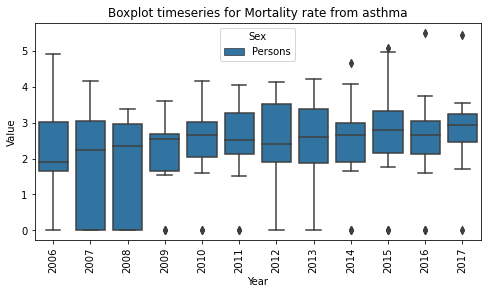

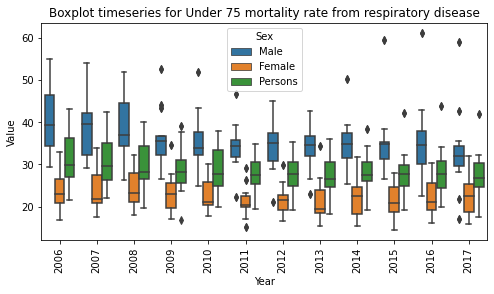

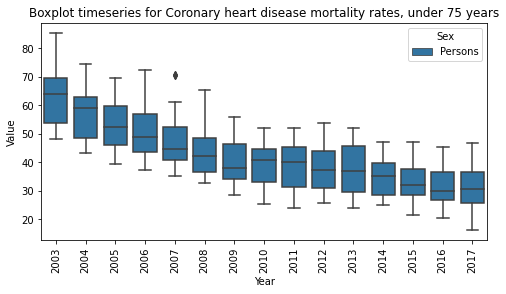

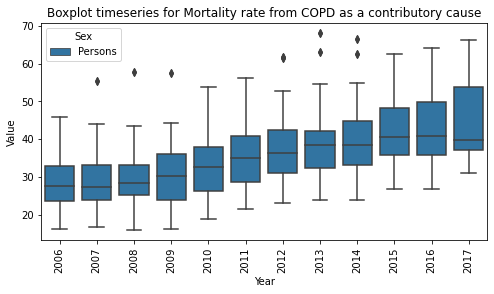

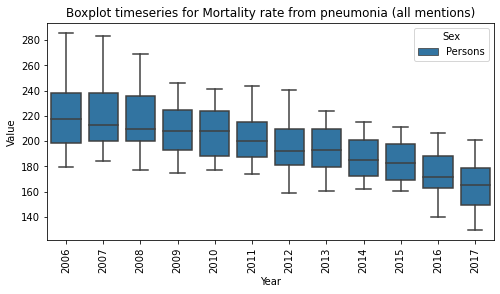

In [5]:
# Let's get a quick look at any differences or missing data by sex:
for i in indicators: 
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x="Year", y="Value", data=df_full[df_full["Indicator Name"] == i], ax=ax, hue='Sex')
    plt.xticks(rotation=90)
    title = "Boxplot timeseries for " + str(i)
    plt.title(title)

We only have data by sex for one indicator: the mortality rate for people under 75 by respiratory disease. Clearly, the rate of death for males is higher than females. All other indicators only have data aggregated for persons. Let's continue our EDA on a subset of the data: persons.  

In [6]:
df = df_full[df_full.Sex == 'Persons']

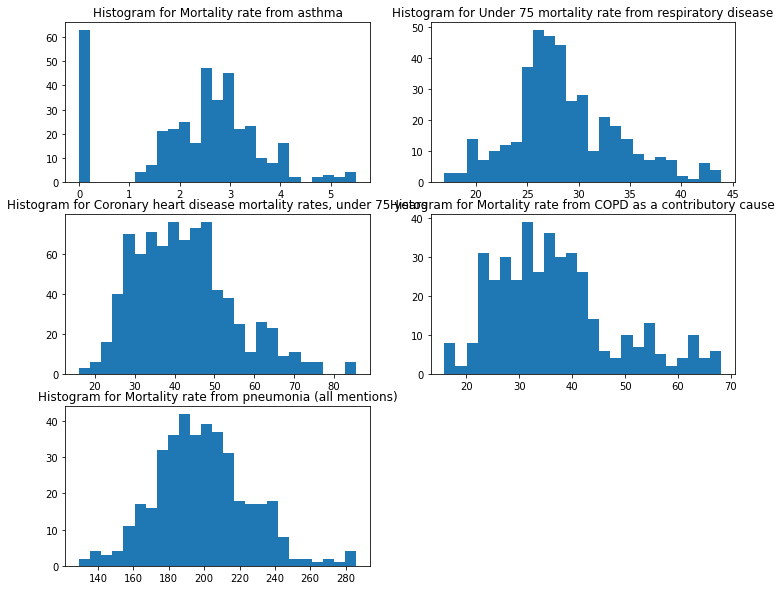

In [7]:
# Create series of histograms for each indicator 
plt.figure(figsize=(12,10))
for i, ind in enumerate(indicators): 
    temp_df = df[df["Indicator Name"] == ind]
    plt.subplot(3,2,i+1) 
    plt.hist(temp_df["Value"],25) 
    title = "Histogram for " + ind
    plt.title(title) 

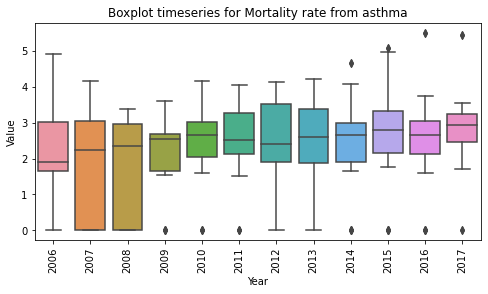

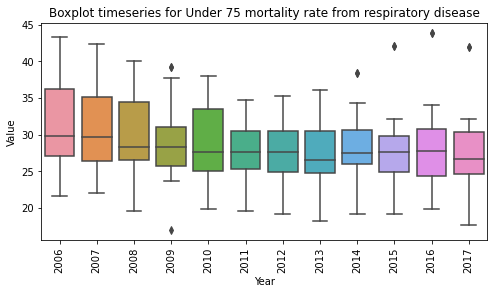

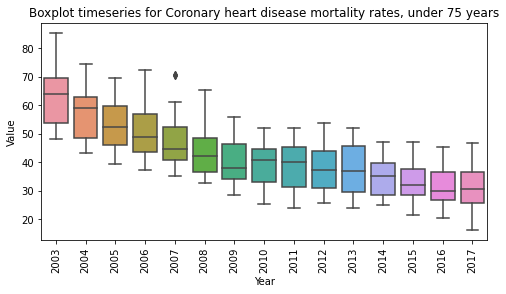

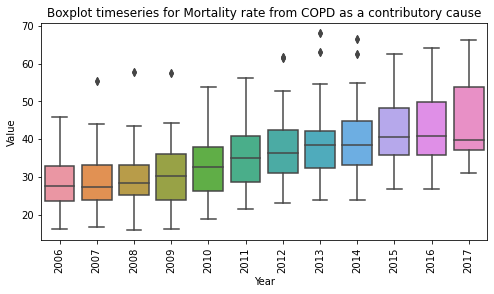

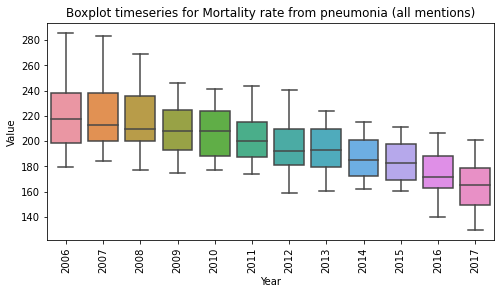

In [8]:
# Create boxplot timeseries for each indicator 
for i in indicators: 
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x="Year", y="Value", data=df[df["Indicator Name"] == i], ax=ax)
    plt.xticks(rotation=90)
    title = "Boxplot timeseries for " + str(i)
    plt.title(title)

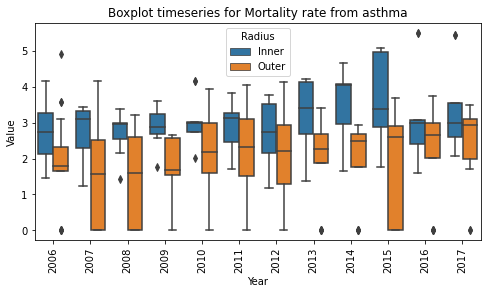

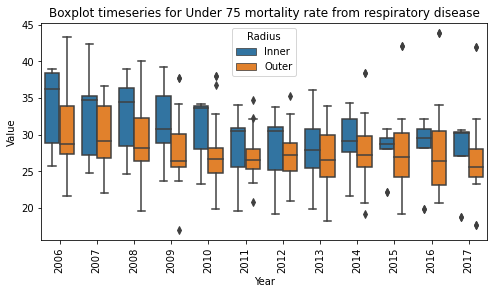

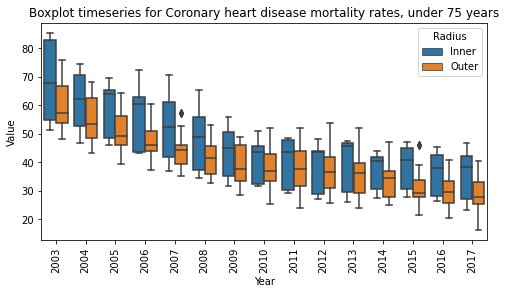

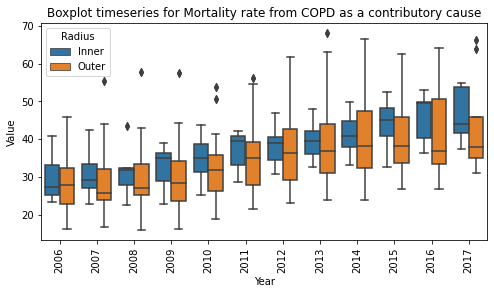

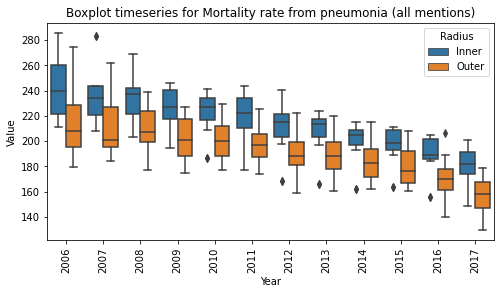

In [9]:
# Now split it by inner and outer CCGs 
for i in indicators: 
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x="Year", y="Value", data=df[df["Indicator Name"] == i], ax=ax, hue='Radius')
    plt.xticks(rotation=90)
    title = "Boxplot timeseries for " + str(i)
    plt.title(title)

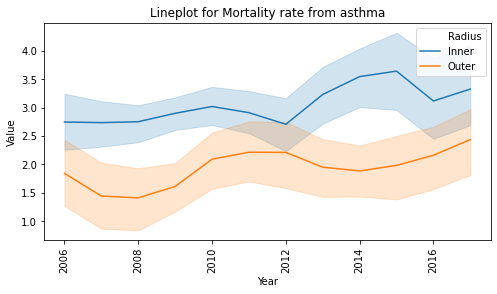

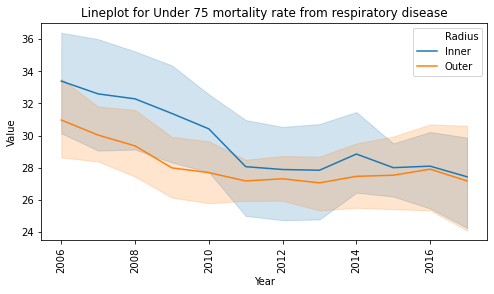

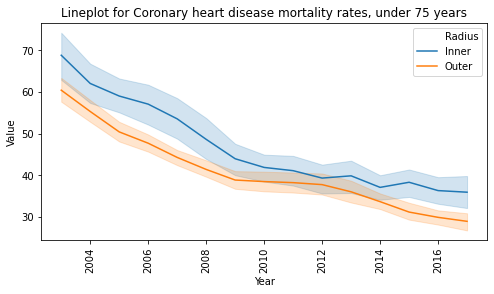

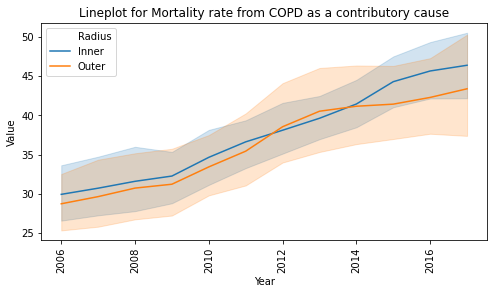

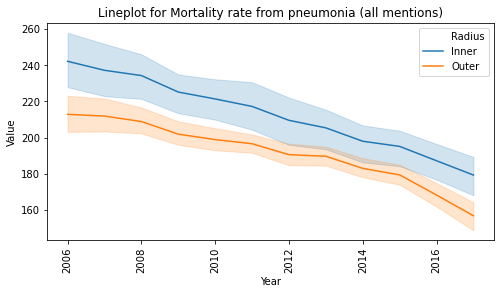

In [10]:
# Create series of line graphs comparing Inner and Outer radius 
for i in indicators: 
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.lineplot(x="Year", y="Value", data=df[df["Indicator Name"] == i], ax=ax, hue='Radius')
    plt.xticks(rotation=90)
    title = "Lineplot for " + str(i)
    plt.title(title)